In [1]:
import os
import numpy as np
import scipy.sparse
import scipy.io
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import stats 
from scipy import * 
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
dataset = 'Lung' # Lung, Immune_Human, Human_Retina, Pancreas
dir_path = "/home/ajita/Documents/data_integration/scDREAMER/data/"
emb_folder = "/home/ajita/Documents/data_integration/scDREAMER_pyTorch/output/"
#emb_folder = "/home/ajita/Documents/data_integration/scDREAMER_pyTorch_implicit_prior/output/"

In [3]:

def load_data(dataset,batch):
    
    if (dataset == "Human_Mouse"):
        dataset = "hum_mou"
        
    adata = sc.read_h5ad(dir_path + dataset + '.h5ad')
    sc.pp.filter_genes(adata, min_counts=3)
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.raw = adata
    sc.pp.highly_variable_genes(
            adata,
            flavor = "seurat",
            n_top_genes = 2000,
            layer = "counts",
            batch_key = batch,
            subset = True
    )
    return adata

batch_key_dic = {'Immune_Human' : 'batch',
                 'Lung' : 'batch',
                 'Pancreas' : 'tech',
                 'Human_Mouse' : 'batch',
                 'Human_Retina': "Batch"
                 
                }
cell_type_key_dic = {'Immune_Human' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Human_Mouse' : "celltype",
                 "Human_Retina":"Subcluster"
                    } 

#lung_latent_matrix_dis_300_0.1, 
#

our_method_emb_dic = {
                "Pancreas" : "Pancreas/Pancreas_latent_matrix",
                 "Immune_Human" : "Immune_Human/Immune_Human_latent_matrix",
                 'Lung' : 'Lung/Lung_latent_matrix_implicit_prior',
                 'Human_Retina': "Human_Retina/Human_Retina_latent_matrix" ,
                'Human_Mouse' : "Human_Mouse/Human_Mouse_latent_matrix"
                } 


In [4]:

embeddings = our_method_emb_dic[dataset]+'.csv'

batch = batch_key_dic[dataset]
cell_type = cell_type_key_dic[dataset]

adata = load_data(dataset,batch)
emb_path = emb_folder + embeddings 

final_embedings=pd.read_csv(emb_path, sep=',',header=None).values
adata.obsm['final_embeddings'] = final_embedings


Clustering...
use rep: final_embeddings
0.0001 1
0.0790421052631579 5
0.15798421052631578 8
0.23692631578947368 10
0.3158684210526316 10
0.3948105263157895 12
0.47375263157894737 14
0.5526947368421052 14
0.6316368421052632 15
0.7105789473684211 17
0.789521052631579 18
0.8684631578947368 18
0.9474052631578948 19
1.0263473684210527 19
1.1052894736842105 19
1.1842315789473685 21
1.2631736842105263 21
1.3421157894736842 23
1.4210578947368422 24
1.5 24


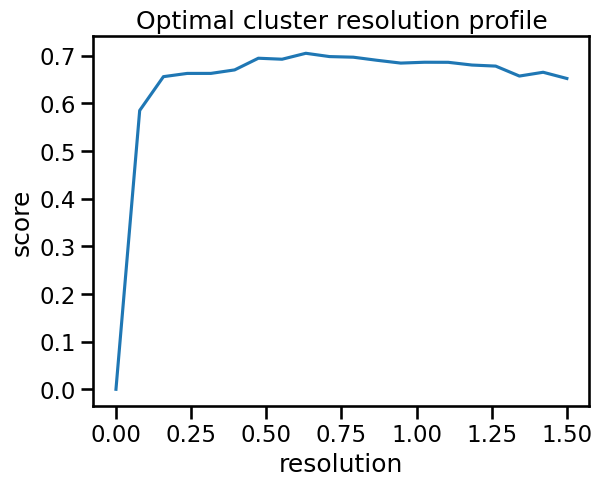

NMI...
ARI...
Silhouette score...
PC regression...
Isolated labels F1...
use rep: final_embeddings
0.0001 1
0.0790421052631579 5
0.15798421052631578 8
0.23692631578947368 10
0.3158684210526316 10
0.3948105263157895 12
0.47375263157894737 14
0.5526947368421052 14
0.6316368421052632 15
0.7105789473684211 17
0.789521052631579 18
0.8684631578947368 18
0.9474052631578948 19
1.0263473684210527 19
1.1052894736842105 19
1.1842315789473685 21
1.2631736842105263 21
1.3421157894736842 23
1.4210578947368422 24
1.5 24
Isolated labels ASW...
Graph connectivity...
kBET...
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 4
Addi

In [5]:
import scIB
results,ilisi_all,clisi_all,kbet_all  =   scIB.metrics.metrics(                
                adata,
                adata,
                batch_key = batch, #need to change according
                label_key = cell_type, #need to change according
                hvg_score_=False,
                cluster_key='cluster',
                cluster_nmi=None,
                ari_=True,
                nmi_=True,
                nmi_method='arithmetic',
                nmi_dir=None,
                silhouette_=True, #
                embed= 'final_embeddings', #need to change according 
                si_metric='euclidean',
                pcr_=True,
                cell_cycle_=False,
                organism='mouse',
                isolated_labels_=True,  # backwards compatibility # isolated scores False for human mouse
                isolated_labels_f1_=True,
                isolated_labels_asw_=True,
                n_isolated=None,
                graph_conn_=True, #
                kBET_=True,#True,#
                kBET_sub=0.5,
                lisi_graph_=True,#
                lisi_raw=True,#
                trajectory_=False,
                type_=None,
                verbose=False,
        )

In [6]:
results

,0
NMI_cluster/label,0.704769
ARI_cluster/label,0.563450
ASW_label,0.550487
ASW_label/batch,0.838789
PCR_batch,0.769316
cell_cycle_conservation,NaN
isolated_label_F1,0.838002
isolated_label_silhouette,0.470803
graph_conn,0.779112
kBET,0.503014


In [7]:
ilisi_all

,batch
0,2.005374
1,4.443726
2,3.769222
3,2.734829
4,6.453015
...,...
16394,2.365193
16395,4.436316
16396,4.395094
16397,2.465425


In [8]:
kbet_all

0     [0.8671328671328671, 0.8414918414918415, 0.841...
1     [0.7804878048780488, 0.8292682926829268, 0.788...
2     [0.37209302325581395, 0.3488372093023256, 0.25...
3     [0.9186666666666666, 0.912, 0.92, 0.9106666666...
4     [0.04411764705882353, 0.058823529411764705, 0....
5     [0.7373737373737373, 0.6868686868686869, 0.787...
6     [0.5, 0.49444444444444446, 0.49444444444444446...
7     [0.7848101265822784, 0.8069620253164557, 0.806...
8     [0.43820224719101125, 0.43820224719101125, 0.5...
9     [0.3918918918918919, 0.3783783783783784, 0.364...
10    [0.2, 0.2857142857142857, 0.14285714285714285,...
11    [0.04, 0.04, 0.08, 0.0, 0.04, 0.04, 0.0, 0.0, ...
12    [0.6818181818181818, 0.711038961038961, 0.7662...
13    [0.3484848484848485, 0.3484848484848485, 0.373...
14    [0.7372262773722628, 0.7518248175182481, 0.788...
15    [0.3558282208588957, 0.34355828220858897, 0.31...
16    [0.0625, 0.0625, 0.020833333333333332, 0.08333...
Name: kBET_all, dtype: object

In [9]:
import numpy as np
path_to_save = "/home/ajita/Documents/data_integration/scDREAMER/scDREAMER/metrics/"
np.savetxt(path_to_save+dataset+"_ilisi.csv", ilisi_all, delimiter=",")
np.savetxt(path_to_save+dataset+"_clisi.csv", clisi_all, delimiter=",")
np.savetxt(path_to_save+dataset+"_kbet_all.csv",np.concatenate([np.array(val).reshape(1,-1) for val in kbet_all],axis = 0), delimiter=',')

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi


latent_matrix = adata.obsm['final_embeddings'] 
labels = np.array(adata.obs[cell_type])
K = np.size(np.unique(labels))
kmeans = KMeans(n_clusters=K, random_state=0).fit(latent_matrix)
y_pred = kmeans.labels_

print('Computing NMI ...')
NMI = nmi(labels.flatten(), y_pred.flatten())
print('NMI = {}'.format(NMI))

Computing NMI ...
NMI = 0.614084668584962


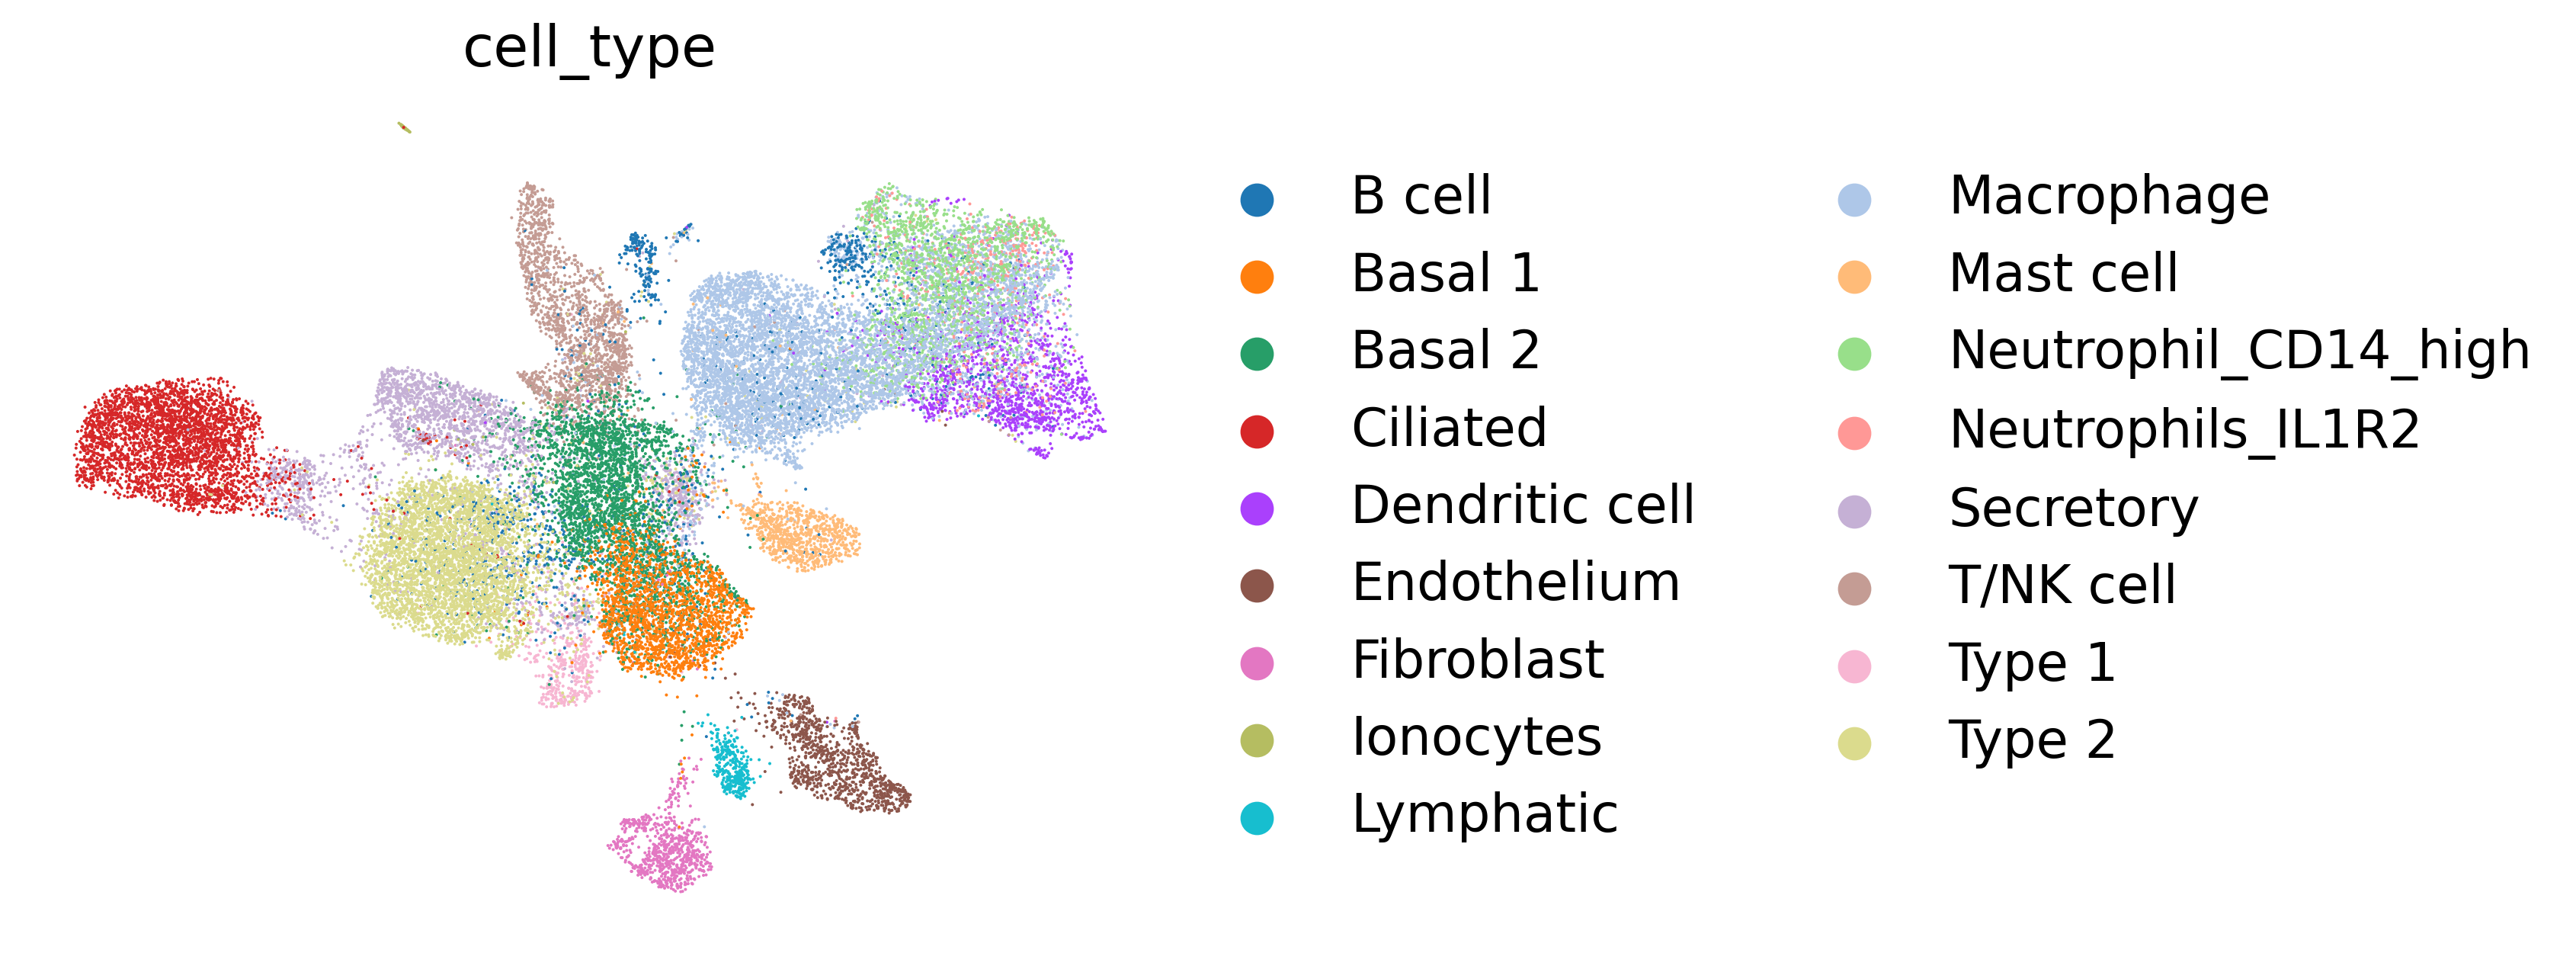

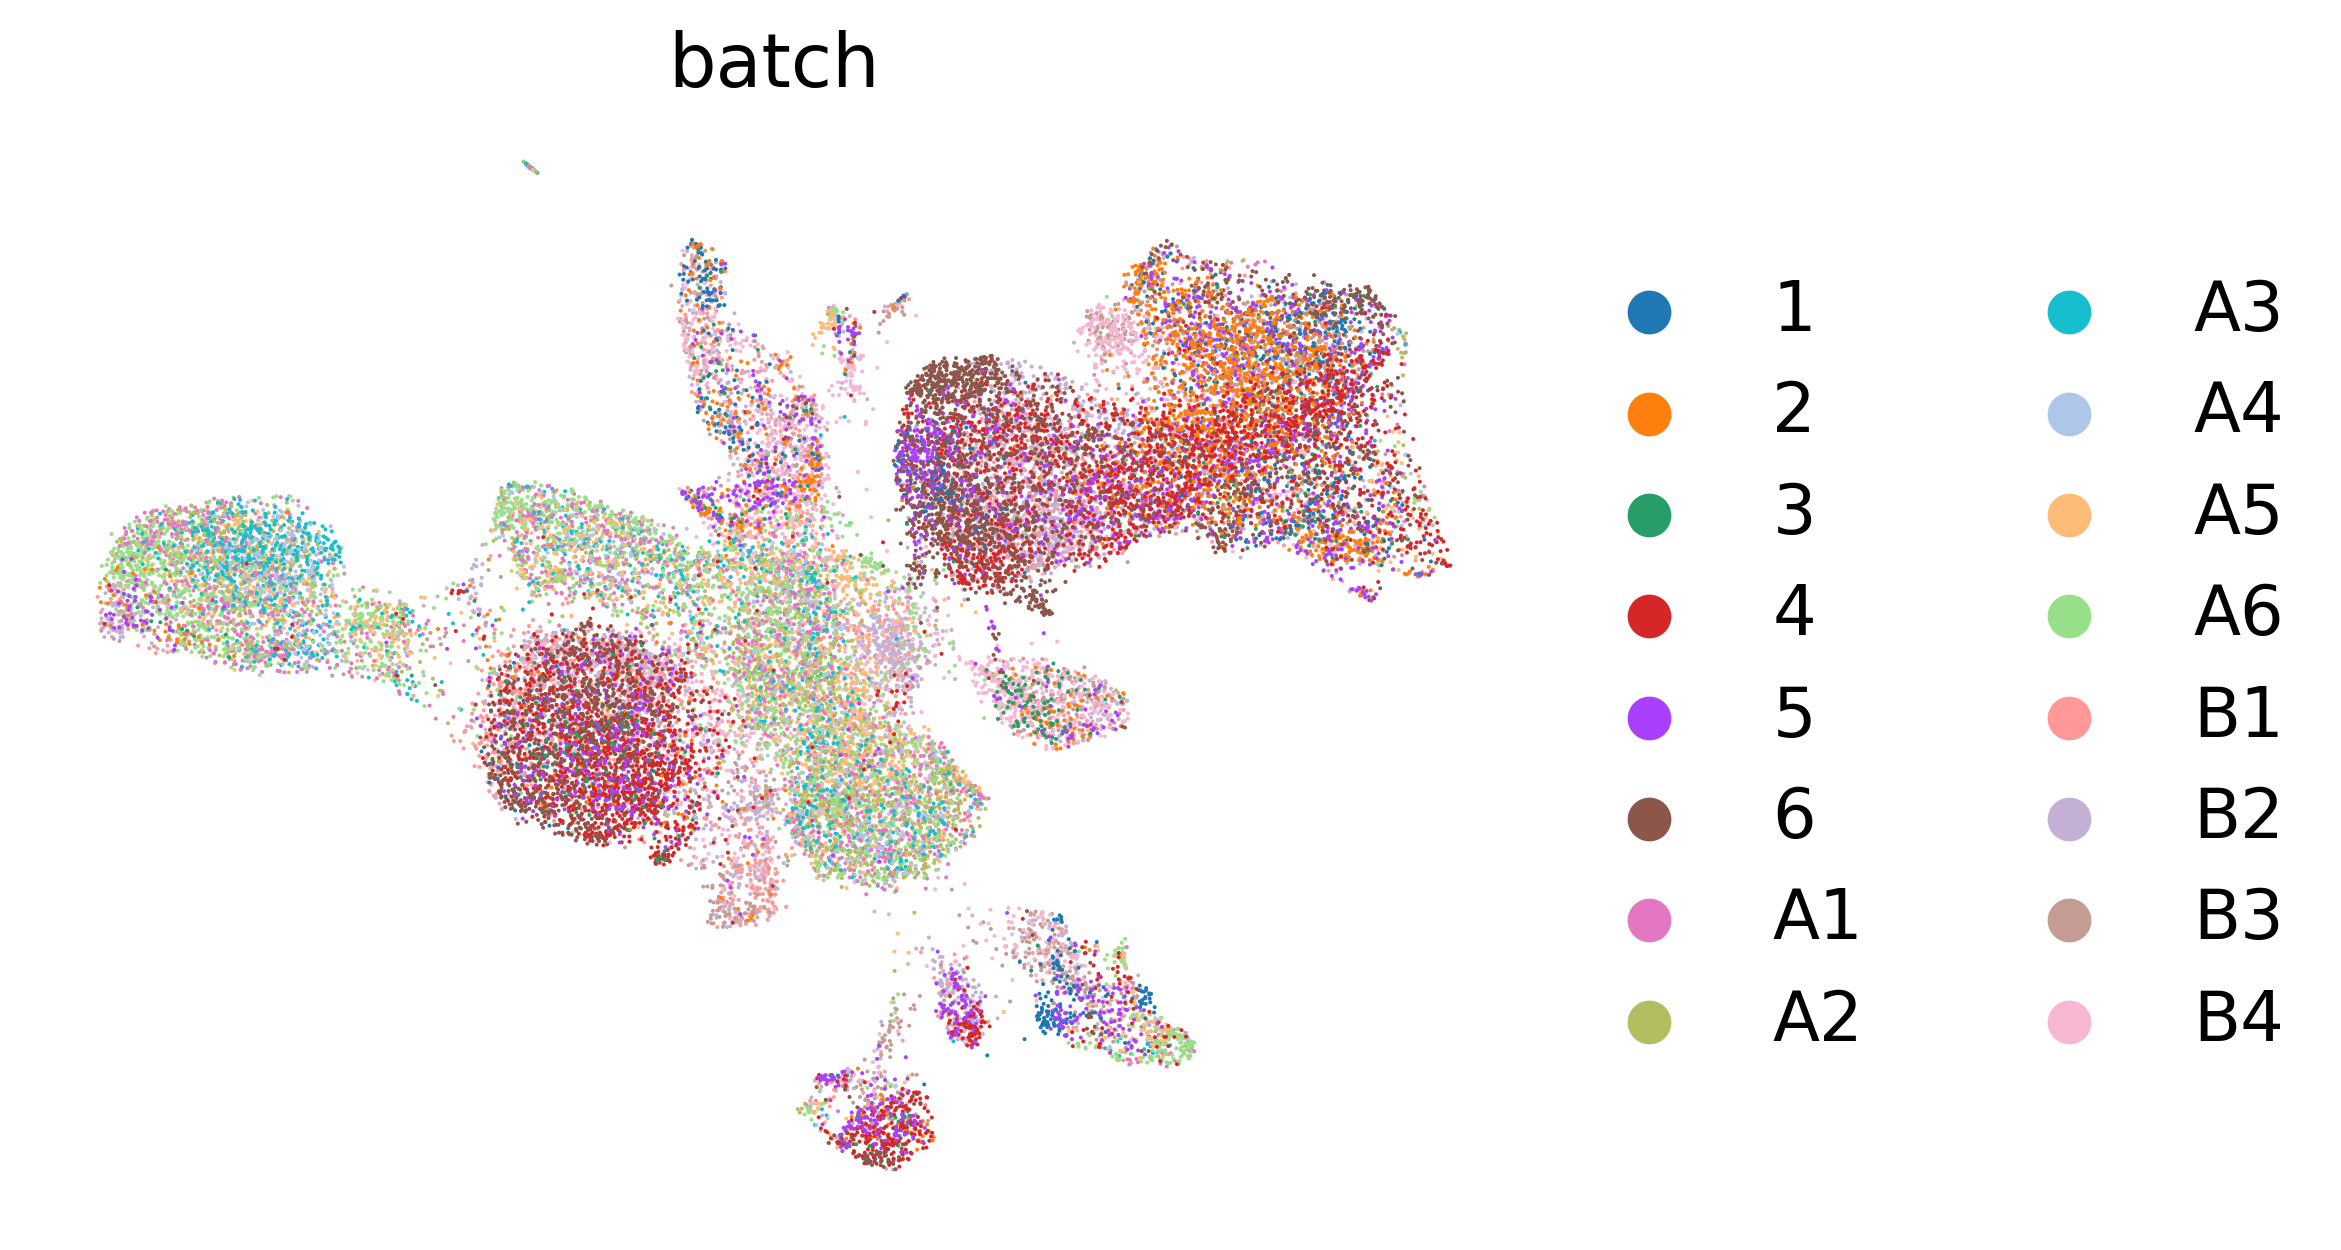

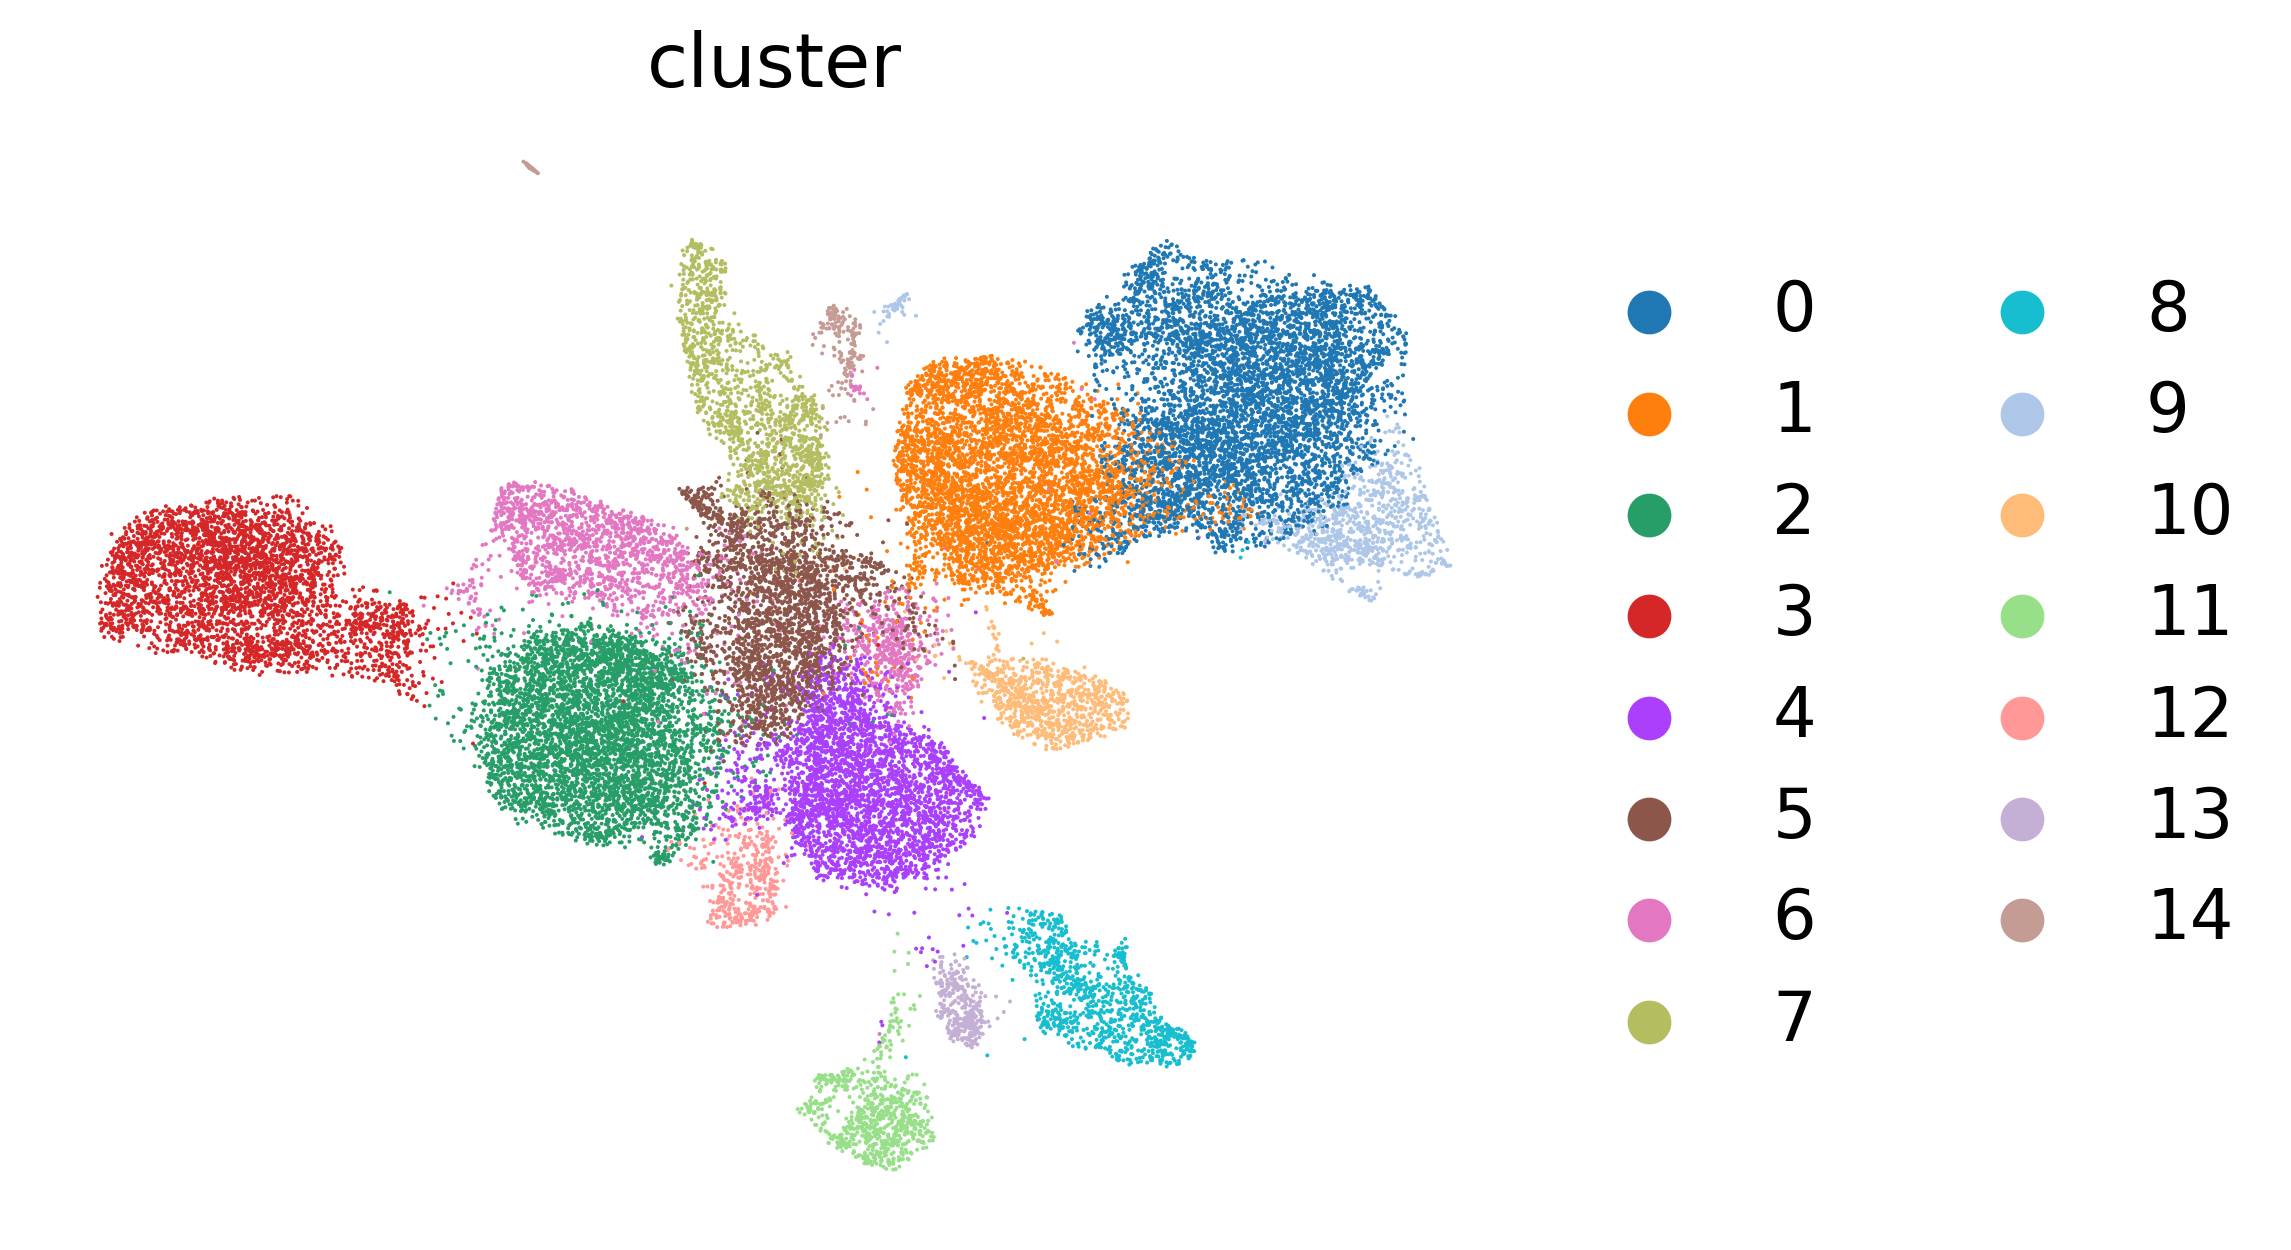

In [12]:
sc.pp.neighbors(adata, use_rep='final_embeddings')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color=cell_type, frameon=False)
sc.pl.umap(adata, color=batch, frameon=False)
sc.pl.umap(adata, color='cluster', frameon=False)

In [13]:
"""
Lung	scDREAMER-woDis	0.662155	0.499891	0.540511	0.874639	0.756987	0.248491	0.526552	0.646457	0.576346	0.260227	0.948805			250 epcohs	nan at 300					
"""

'\nLung\tscDREAMER-woDis\t0.662155\t0.499891\t0.540511\t0.874639\t0.756987\t0.248491\t0.526552\t0.646457\t0.576346\t0.260227\t0.948805\t\t\t250 epcohs\tnan at 300\t\t\t\t\t\n'